In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import check_grad
import scipy.optimize as opt
import scipy.linalg as la



In [ ]:
def custmin(fun, x0, args=(), maxfev=None, alpha=0.0002,
        maxiter=100000, tol=1e-10, callback=None, **options):
    """Implements simple gradient descent for the Rosen function."""
    bestx = x0
    bestf = fun(x0)
    funcalls = 1
    niter = 0
    improved = True
    stop = False

    while improved and not stop and niter < maxiter:
        niter += 1
        # the next 2 lines are gradient descent
        step = alpha * rosen_der(bestx)
        bestx = bestx - step

        bestf = fun(bestx)
        funcalls += 1

        if la.norm(step) < tol:
            improved = False
        if callback is not None:
            callback(bestx)
        if maxfev is not None and funcalls >= maxfev:
            stop = True
            break

    return opt.OptimizeResult(fun=bestf, x=bestx, nit=niter,
                              nfev=funcalls, success=(niter > 1))

In [ ]:
def reporter(p):
    """Reporter function to capture intermediate states of optimization."""
    global ps
    ps.append(p)

In [ ]:
H = np.array([
    [802, -400],
    [-400, 200]
])

In [ ]:
np.linalg.cond(H)

2508.009601277225

In [ ]:
U, s, Vt = np.linalg.svd(H)
s[0]/s[1]


2508.0096012772256

In [ ]:
def rosen(x):
    """Generalized n-dimensional version of the Rosenbrock function"""
    return sum(100*(x[1:]-x[:-1]**2.0)**2.0 +(1-x[:-1])**2.0)

In [ ]:
def rosen_der(x):
    """Derivative of generalized Rosen function."""
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [ ]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

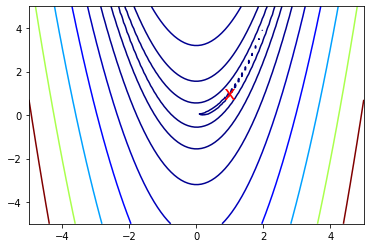

In [ ]:
# Note: the global minimum is at (1,1) in a tiny contour island
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
pass

In [ ]:
x = np.linspace(0, 2, 100)
y = np.linspace(0, 2, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

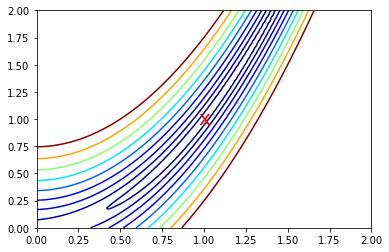

In [ ]:
plt.contour(X, Y, Z, [rosen(np.array([k, k])) for k in np.linspace(1, 1.5, 10)], cmap='jet')
plt.text(1, 1, 'x', va='center', ha='center', color='red', fontsize=20)
pass

In [ ]:
for x in np.random.uniform(-2,2,(10,2)):
  print(x, check_grad(rosen, rosen_der,x))

[-1.31752387 -0.21705729] 1.4027738761995791e-05
[ 0.15105283 -0.03943759] 1.5272154068193508e-06
[1.85910364 0.48346443] 4.968283805361561e-05
[-0.12963709  0.72082117] 2.3625990672276072e-06
[-1.64792452 -0.65877427] 4.825035220199064e-05
[ 0.01606044 -0.94231465] 3.1990792175192497e-06
[-1.64386362  1.06979841] 2.4725846026290543e-05
[-1.32511709 -0.30238047] 1.3061449587618838e-05
[-0.92506532  1.19642415] 4.322272134999617e-06
[0.02670166 0.50394669] 2.1554569125584593e-06


In [ ]:
# Initial starting position
x0 = np.array([4,-4.1])
ps = [x0]
opt.minimize(rosen, x0, method=custmin, callback=reporter)

     fun: 1.060466347344834e-08
    nfev: 100001
     nit: 100000
 success: True
       x: array([0.9998971 , 0.99979381])

In [ ]:

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

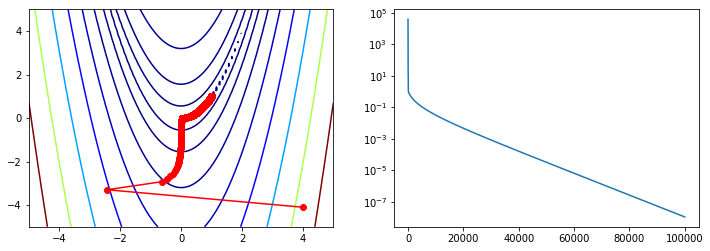

In [ ]:

ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T))
pass

In [ ]:
from scipy.optimize import rosen, rosen_der, rosen_hess

In [ ]:
x0 = np.array([4,-4,1])
ps = [x0]
opt.minimize(rosen, x0,method='CG', jac=rosen_der, hess=rosen_hess, callback=reporter)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:511: RuntimeWarning: Method CG does not use Hessian information (hess).
  RuntimeWarning)


     fun: 1.853234820952042e-11
     jac: array([2.77944072e-06, 2.85383055e-06, 2.68882188e-06])
 message: 'Optimization terminated successfully.'
    nfev: 148
     nit: 72
    njev: 148
  status: 0
 success: True
       x: array([1.00000192, 1.00000385, 1.00000771])

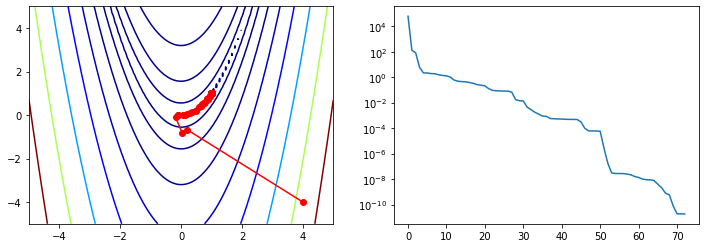

In [ ]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T))
pass

In [ ]:
x0 = np.array([4,-4,1])
ps = [x0]
opt.minimize(rosen, x0,method='Newton-CG', jac=rosen_der, hess=rosen_hess, callback=reporter)

     fun: 8.738993547172786e-13
     jac: array([ 2.98223559e-05,  1.04394624e-04, -6.05416288e-05])
 message: 'Optimization terminated successfully.'
    nfev: 64
    nhev: 49
     nit: 49
    njev: 112
  status: 0
 success: True
       x: array([0.99999958, 0.99999916, 0.99999832])

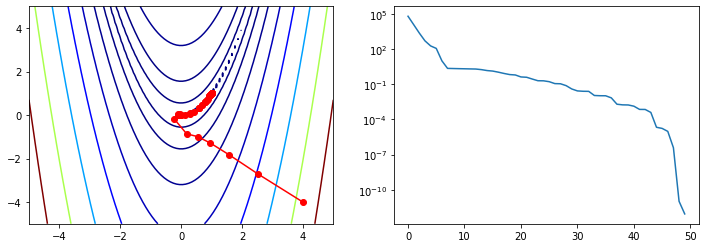

In [ ]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T))
pass

Stochastic algorithm

In [ ]:
x0 = np.array([4,-4,1])
ps = [x0]
opt.minimize(rosen, x0, method ='BFGS',jac=rosen_der, hess=rosen_hess, callback=reporter)

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_minimize.py:511: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


      fun: 4.98176543440709e-14
 hess_inv: array([[0.10052081, 0.198832  , 0.39735021],
       [0.198832  , 0.39820661, 0.79577815],
       [0.39735021, 0.79577815, 1.59533086]])
      jac: array([ 5.04852368e-06,  1.39897612e-06, -2.12658795e-06])
  message: 'Optimization terminated successfully.'
     nfev: 67
      nit: 53
     njev: 67
   status: 0
  success: True
        x: array([0.99999994, 0.99999987, 0.99999972])

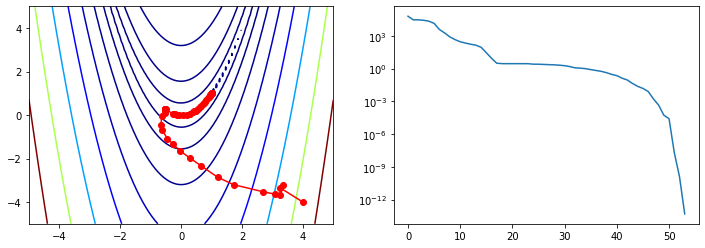

In [ ]:
ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5, cmap='jet')
plt.plot(ps[:, 0], ps[:, 1], '-ro')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T))
pass